# **Comparacion experimental y numérica**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="./Datos/Imagenes/Logos.png" style="height: 7em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Tutor: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](./Datos/Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Toolbox_publica/blob/main/04_Articulo.ipynb)

---

In [ ]:
# Instalación para Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    import os
    
    # Si ya existe el directorio, no clonarlo de nuevo
    if not os.path.exists('Toolbox_publica'):
        print("Clonando repositorio completo desde GitHub")
        !git clone https://github.com/OmarURP/Toolbox_publica.git
        print("Repositorio clonado!")
    
    # Cambiar al directorio del repositorio
    os.chdir('Toolbox_publica')
    
    # Instalar el módulo
    print("Instalando ImtaTURB...")
    !pip install -e .
    print("Todo listo!")
else:
    print("Ejecutando localmente")

In [13]:
import ImtaTURB as imta

In [14]:
# Datos experimentales
file_vectrino = r'Datos/Vectrino/20_cm/C_1.mat'
# Datos numéricos
file_openfoam = "Datos/OpenFOAM/20_cm/U_Articulo"

Datos cargados
Archivo: Datos/Vectrino/20_cm/C_1.mat

Componentes de velocidad [u_i]:
  u1: (36001, 10)
  u2: (36001, 10)
  u3: (36001, 10)
  u4: (36001, 10)

Tiempo= (36001,)
  Duración = 360.00 s
  dt = 0.0100 s

Parámetros de configuración de equipo:
  Frecuencia de muestreo: 100.00 Hz
  Velocidad del sonido: 1487.50 m/s
Componente r11: Frecuencia máxima = 0.704 Hz, Energía = 1.469e+05
Componente r12: Frecuencia máxima = 0.704 Hz, Energía = 6.619e+05
Componente r13: Frecuencia máxima = 0.681 Hz, Energía = 5.181e+04
Componente r22: Frecuencia máxima = 0.681 Hz, Energía = 3.049e+06
Componente r23: Frecuencia máxima = 0.681 Hz, Energía = 3.056e+05
Componente r33: Frecuencia máxima = 0.026 Hz, Energía = 1.071e+05


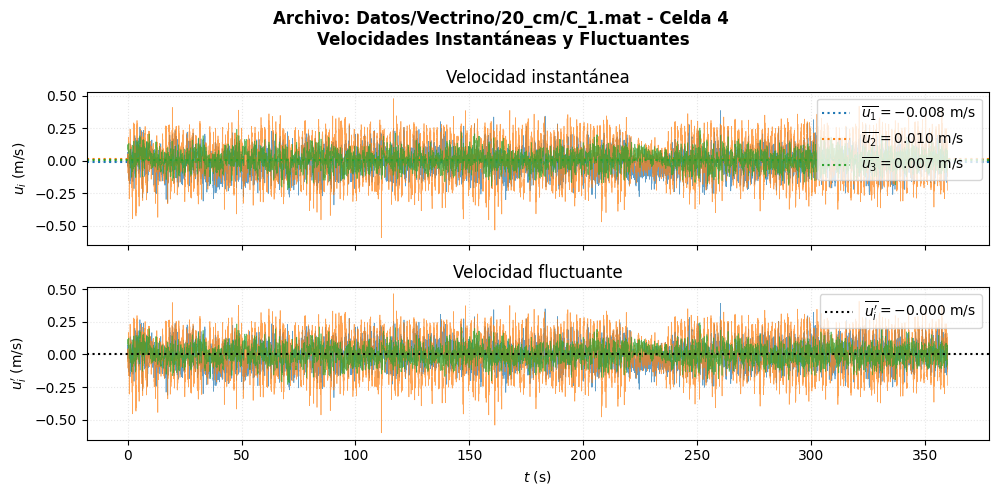

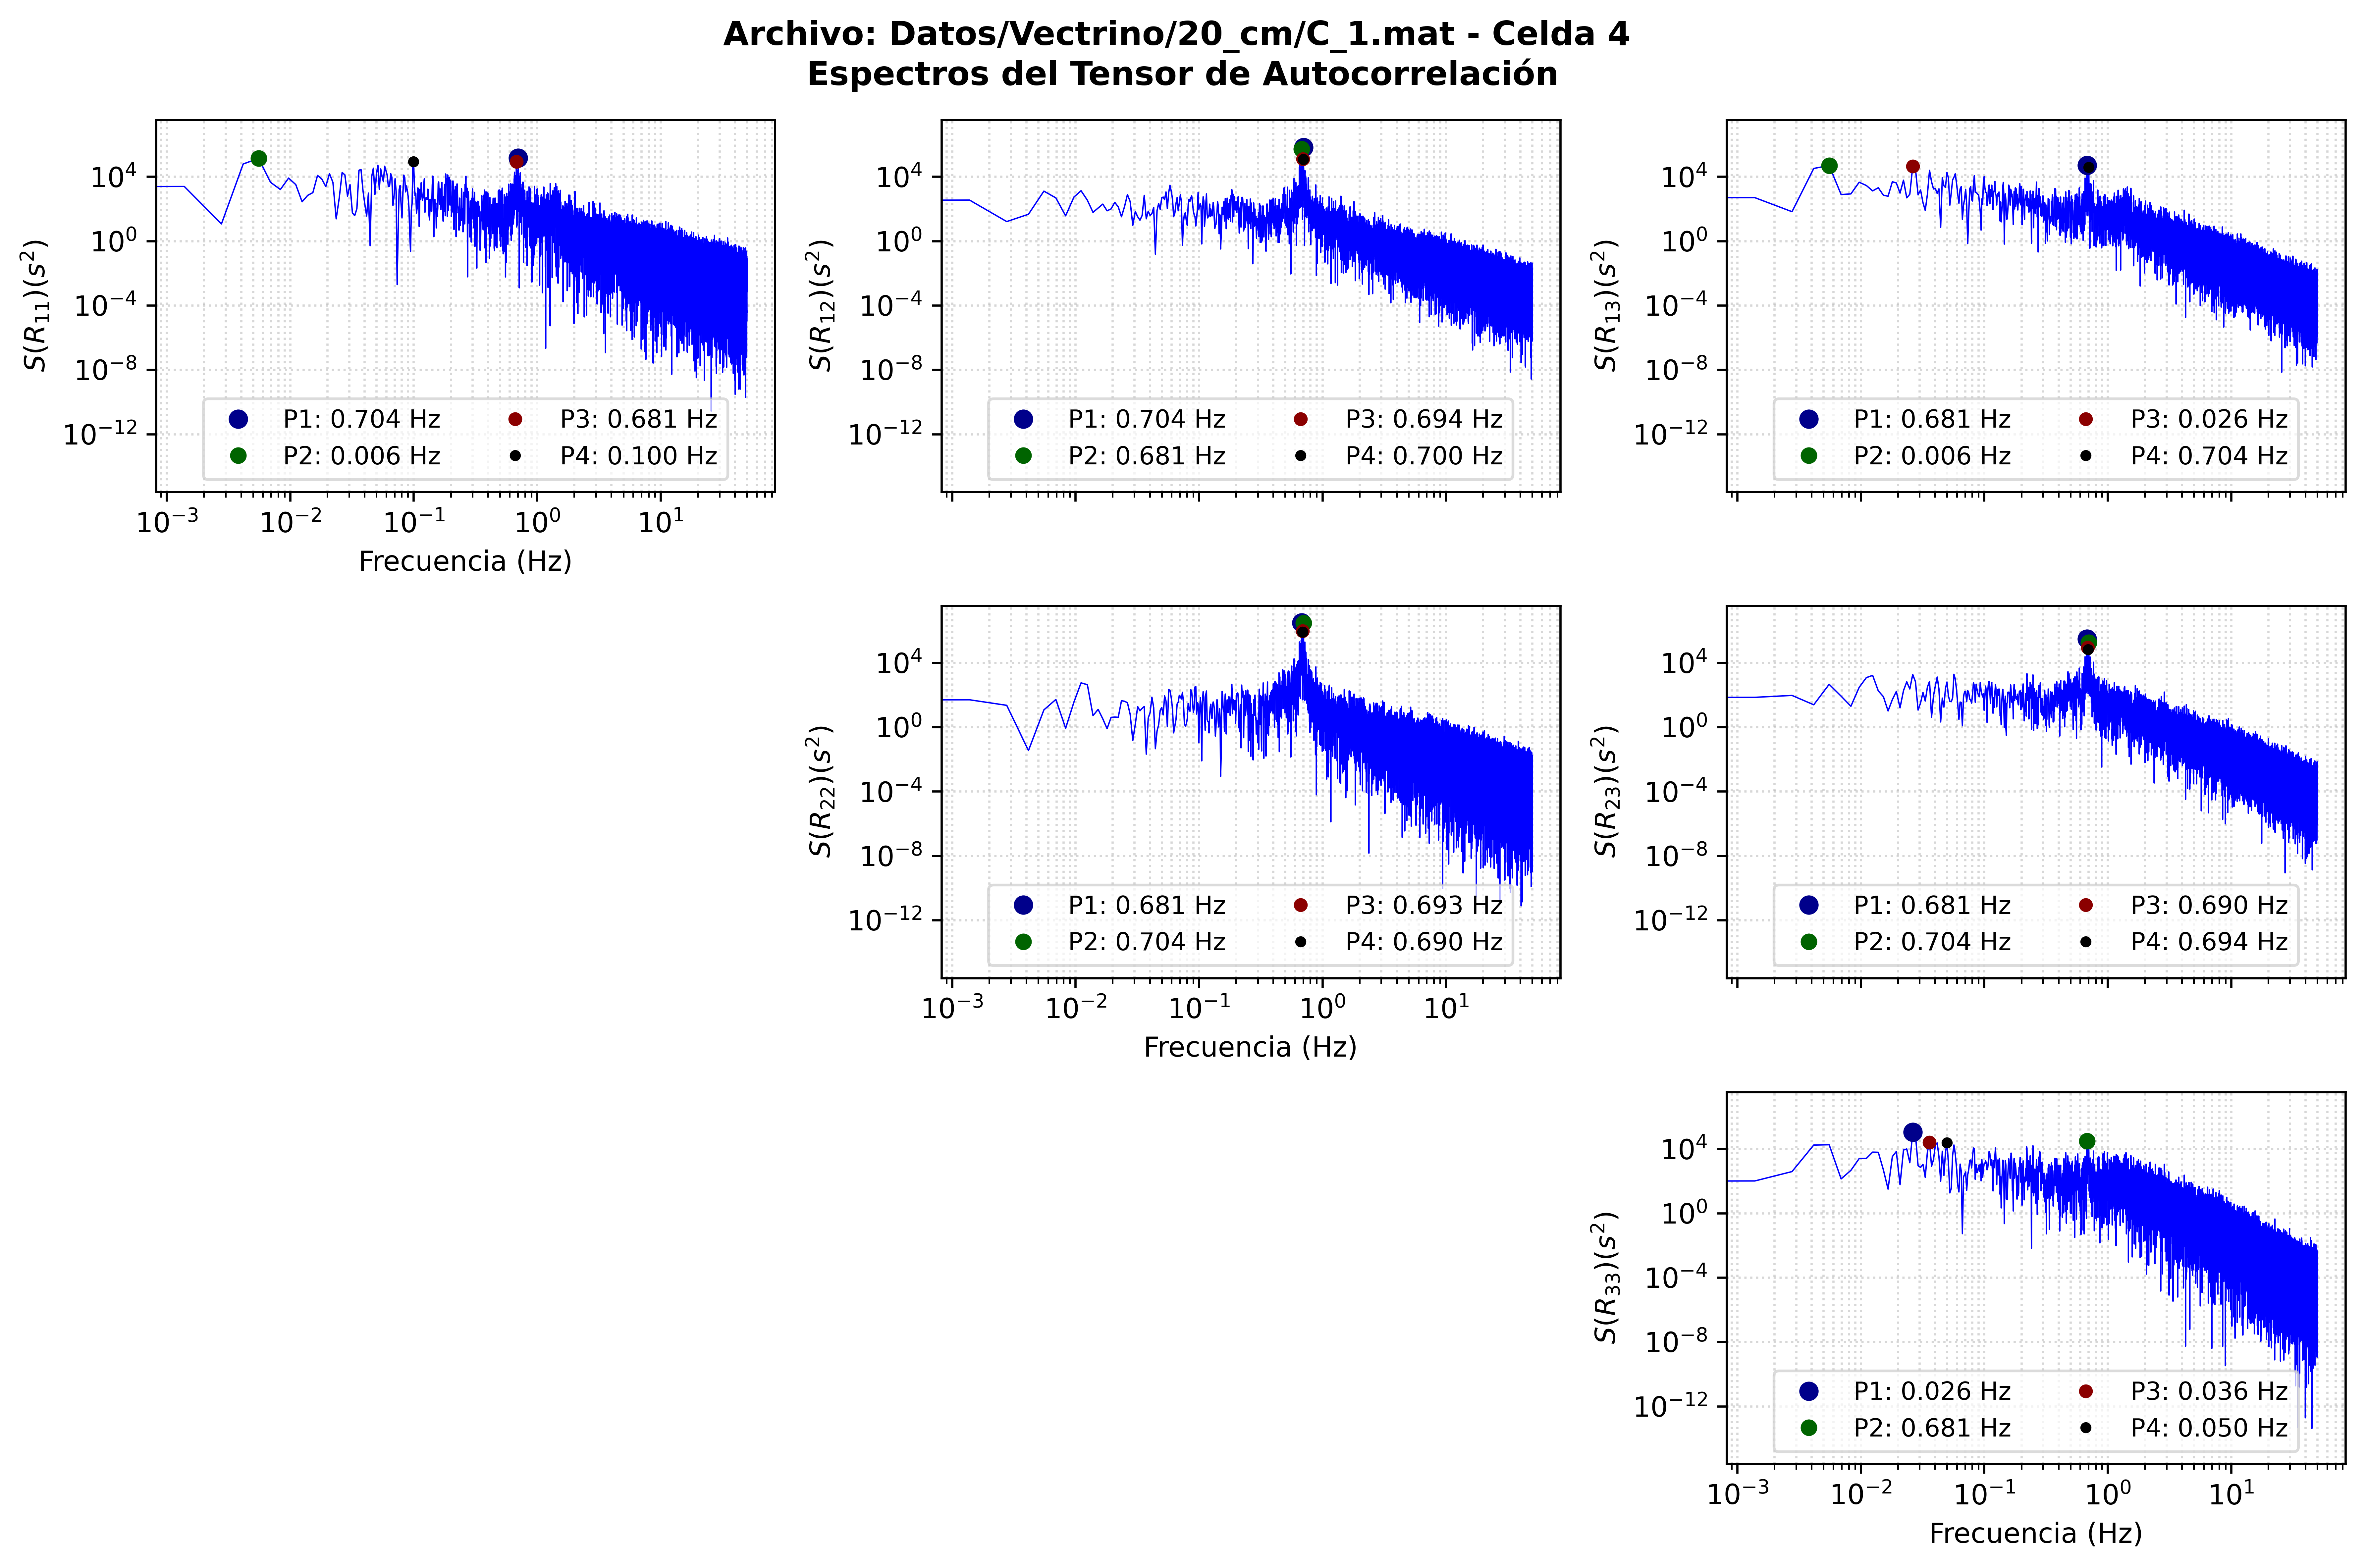

In [15]:
# Experimentales
U, tiempo, parametros = imta.cargar_vectrino(file_vectrino)
celda = 4 # 0 es celda (50), 9 es celda (59)
# Velocidades instantáneas
u1 = U['u1'][:, celda]
u2 = U['u2'][:, celda]
u3 = U['u3'][:, celda]
#tiempo = tiempo[:, celda]
# Velocidades fluctuantes
u1_fluc, fig1 = imta.fluctuante(u1, tiempo=tiempo, plot=False, titulo='Velocidad u1')
u2_fluc, fig2 = imta.fluctuante(u2, tiempo=tiempo, plot=False, titulo='Velocidad u2')
u3_fluc, fig3 = imta.fluctuante(u3, tiempo=tiempo, plot=False, titulo='Velocidad u3')
imta.plot_ui(tiempo, u1_fluc, u2_fluc, u3_fluc,
            titulo=f'Archivo: {file_vectrino} - Celda {celda} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));
# Autocorrelación normalizada
frecuencia = parametros['frec'].item()  # Valor de frecuencia de muestreo (Hz)
tensor_r, lags_s, fig = imta.autocorrelacion_norm(u1_fluc['fluc'],
                                                  u2_fluc['fluc'],
                                                  u3_fluc['fluc'],
                                                  frecuencia,
                                                  plot=False,
                                                  titulo=f'Archivo: {file_vectrino} - Celda {celda} \nTensor de Autocorrelación Normalizado',
                                                  max_lag_seg=5.0)
# Espectros
frecuencias, espectro, fig = imta.espectros_tensor(tensor_r,
                                             frecuencia,
                                             titulo=f'Archivo: {file_vectrino} - Celda {celda} \nEspectros del Tensor de Autocorrelación',
                                             plot=True)

---

Se extrajeron 21 probes.
Tiempo inicial: 0.00 s, tiempo final: 200.00 s
Duración de la muestra: 200.00 s
Frecuencia de muestreo: 100.00 Hz (Δt = 0.0100 s)
Coordenadas probe 6: (0.465, 0.1, 0.3)
Componente r11: Frecuencia máxima = 0.053 Hz, Energía = 2.582e+06
Componente r12: Frecuencia máxima = 0.680 Hz, Energía = 2.336e+06
Componente r13: Frecuencia máxima = 0.053 Hz, Energía = 1.248e+06
Componente r22: Frecuencia máxima = 0.680 Hz, Energía = 1.220e+07
Componente r23: Frecuencia máxima = 0.680 Hz, Energía = 6.453e+05
Componente r33: Frecuencia máxima = 0.053 Hz, Energía = 6.027e+05


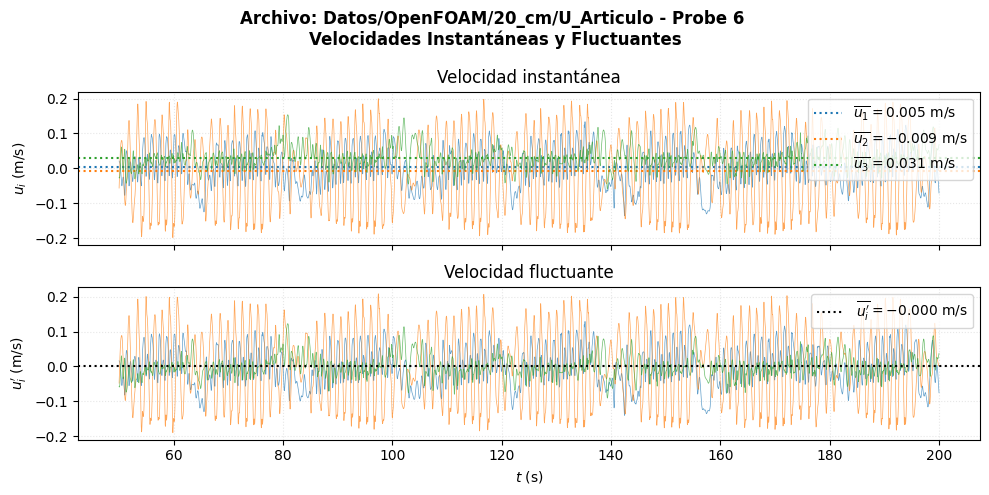

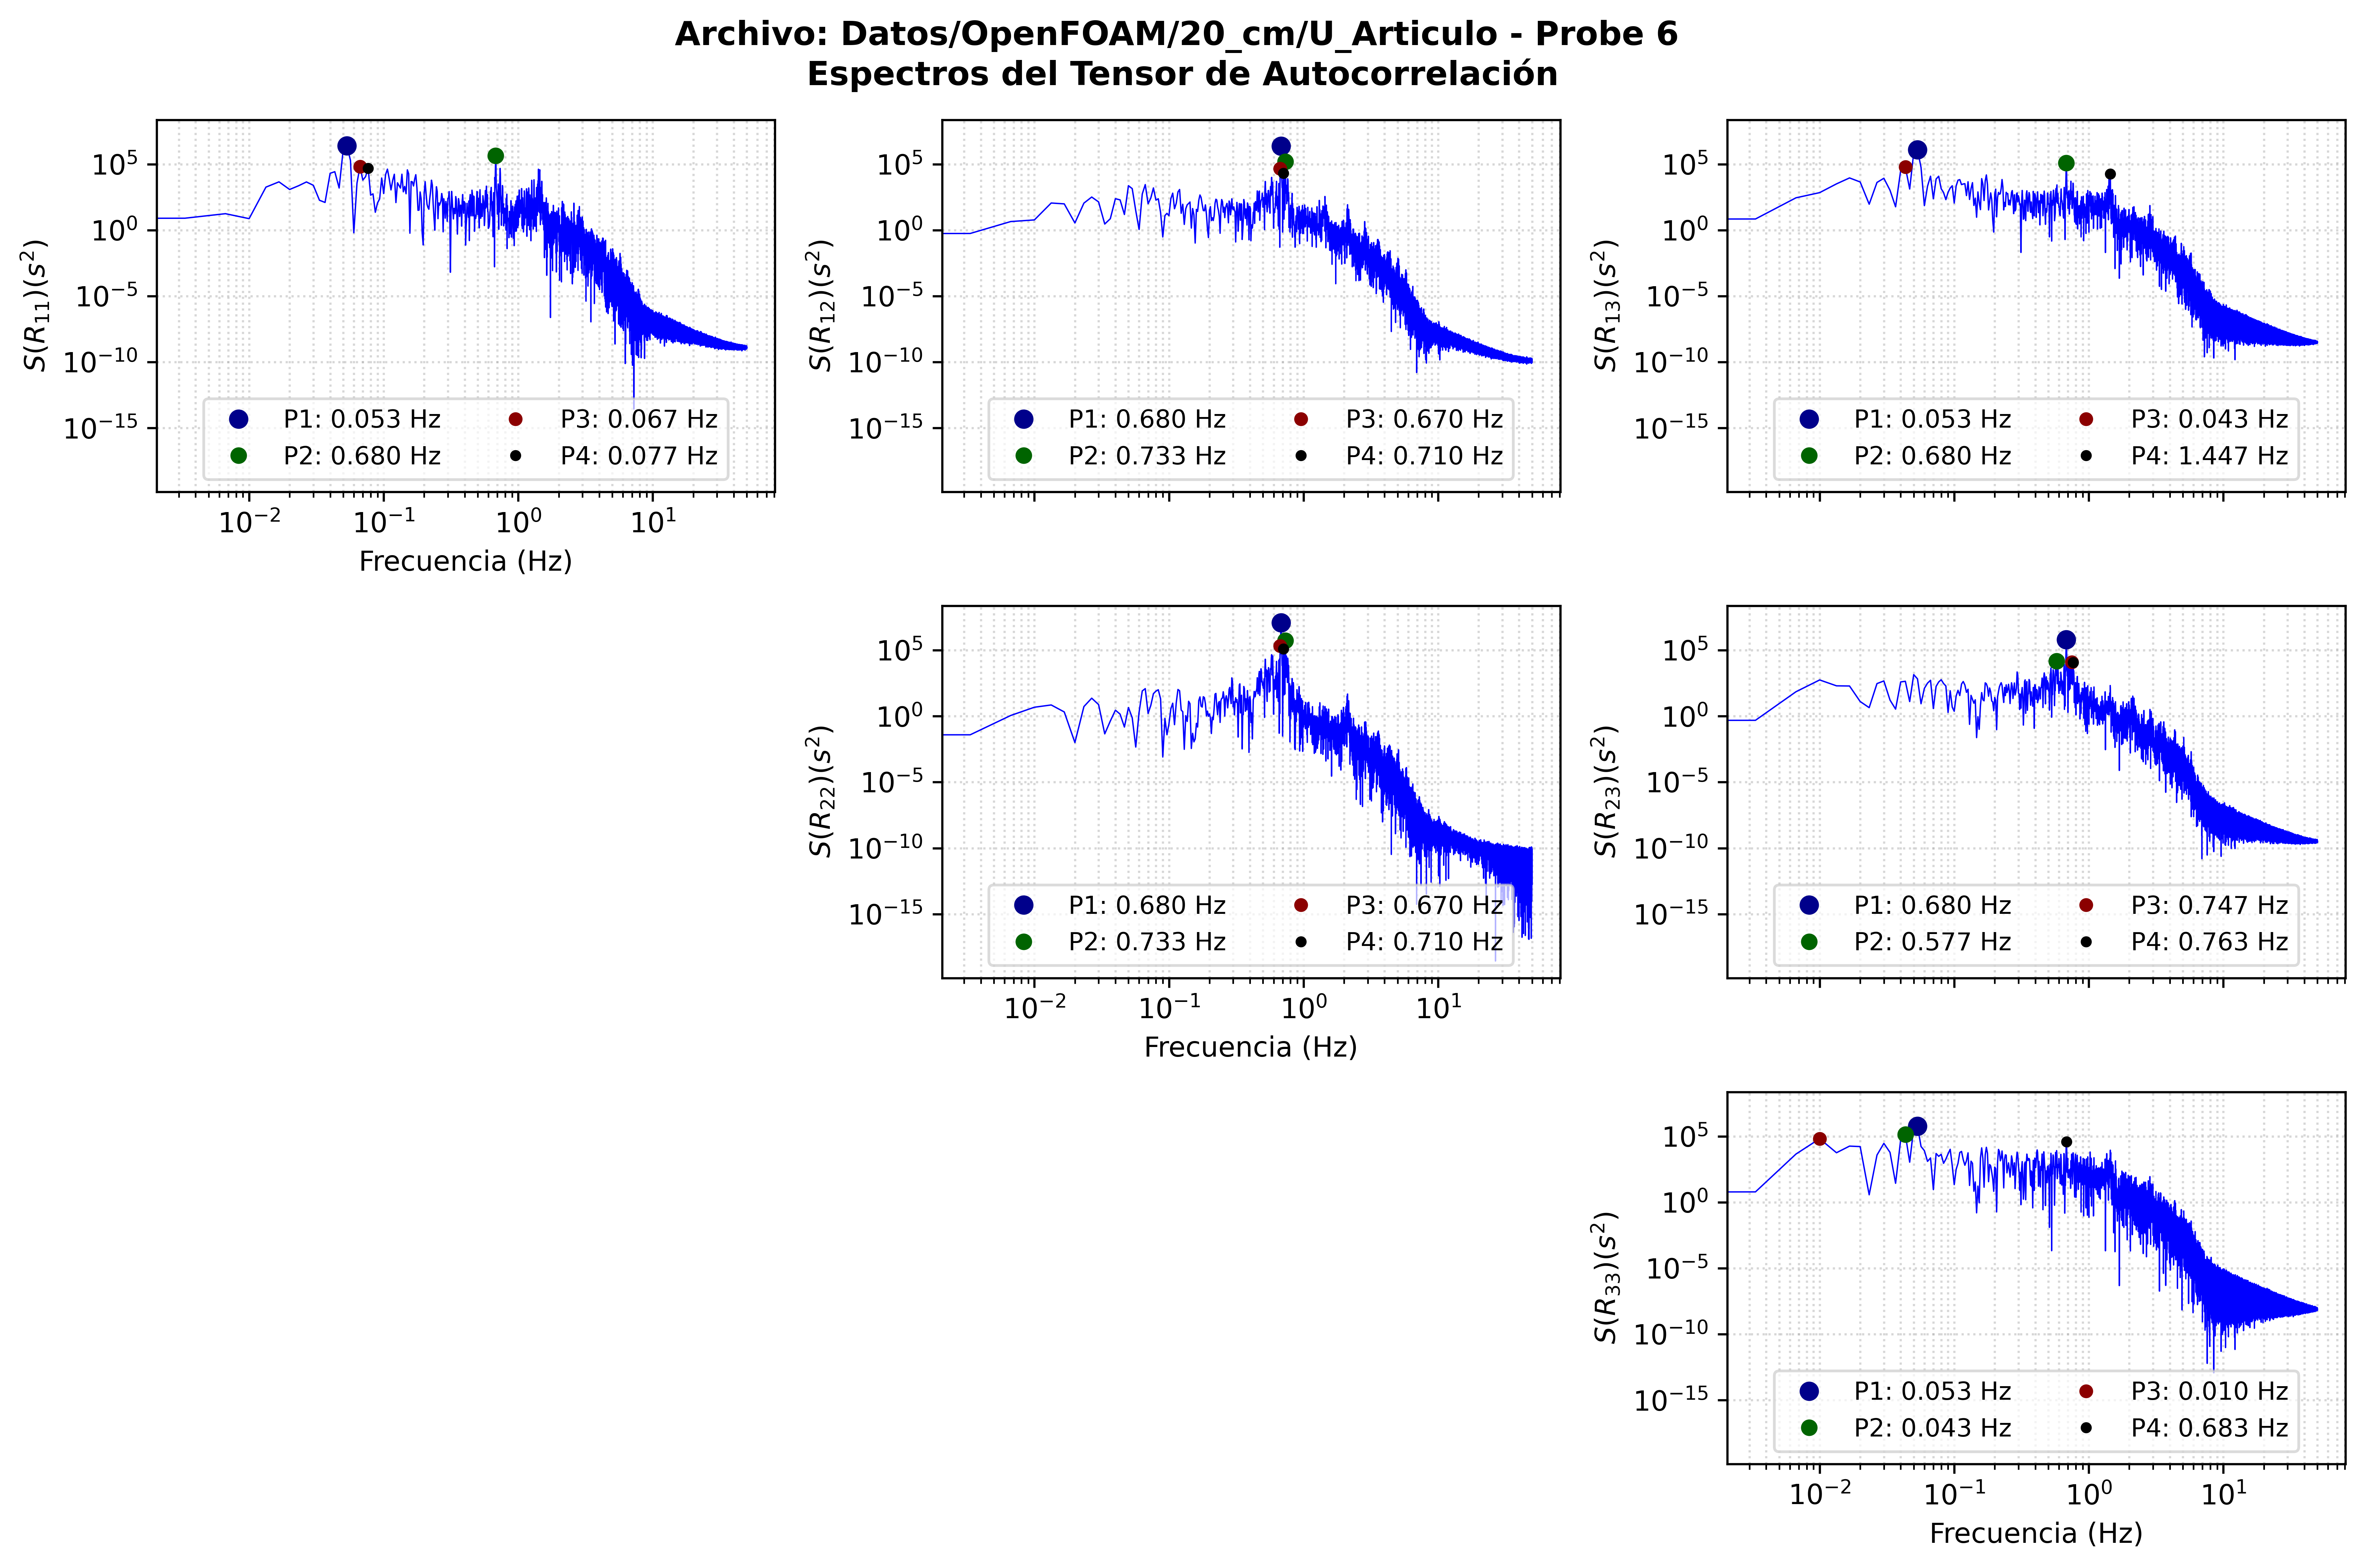

In [16]:
U_probes, tiempo, coords, frecuencia = imta.cargar_U_OpenFOAM(file_openfoam)
# Seleccionar un probe para análisis
probe = 6
print(f"Coordenadas probe {probe}: {coords[probe]}")

# Tiempo de análisis
u1, u2, u3, tiempo, dfp_filt = imta.recortar_tiempo(U_probes, probe,
                                                    inicio= 50.0)

# Velocidades fluctuantes
u1_fluc, fig1 = imta.fluctuante(u1, tiempo=tiempo, plot=False, titulo='Velocidad u1')
u2_fluc, fig2 = imta.fluctuante(u2, tiempo=tiempo, plot=False, titulo='Velocidad u2')
u3_fluc, fig3 = imta.fluctuante(u3, tiempo=tiempo, plot=False, titulo='Velocidad u3')
imta.plot_ui(tiempo, u1_fluc, u2_fluc, u3_fluc,
            titulo=f'Archivo: {file_openfoam} - Probe {probe} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));
# Autocorrelación Normalizada
tensor_r, lags_s, fig = imta.autocorrelacion_norm(u1_fluc['fluc'],
                                                  u2_fluc['fluc'],
                                                  u3_fluc['fluc'],
                                                  frecuencia,
                                                  plot=False,
                                                  titulo=f'Archivo: {file_openfoam} -Probe {probe} \nTensor de Autocorrelación Normalizado',
                                                  max_lag_seg=5.0)
# Espectros
frecuencias, espectro, fig = imta.espectros_tensor(tensor_r,
                                                   frecuencia,
                                                   titulo=f'Archivo: {file_openfoam} - Probe {probe} \nEspectros del Tensor de Autocorrelación',
                                                   plot=True)
